Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 103s 88ms/step - accuracy: 0.3444 - loss: 1.8641 - val_accuracy: 0.8404 - val_loss: 0.5874
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 101s 88ms/step - accuracy: 0.7139 - loss: 0.9106 - val_accuracy: 0.8849 - val_loss: 0.4133
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 141s 87ms/step - accuracy: 0.7839 - loss: 0.7023 - val_accuracy: 0.9009 - val_loss: 0.3522
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 100s 87ms/step - accuracy: 0.8151 - loss: 0.6096 - val_accuracy: 0.9045 - val_loss: 0.3417
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 101s 88ms/step - accuracy: 0.8310 - loss: 0.5613 - val_accuracy: 0.9145 - val_loss: 0.3079
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 100s 87ms/step - accuracy: 0.8423 - loss: 0.5315 - val_accuracy: 0.9160 - val_loss: 0.2982
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 101s 88ms/step - accuracy: 0.8513 - loss: 0.4985 - val_accuracy: 0.9244 - val_loss: 0.2770
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 101s 88ms/step - accuracy: 0.8558 - lo

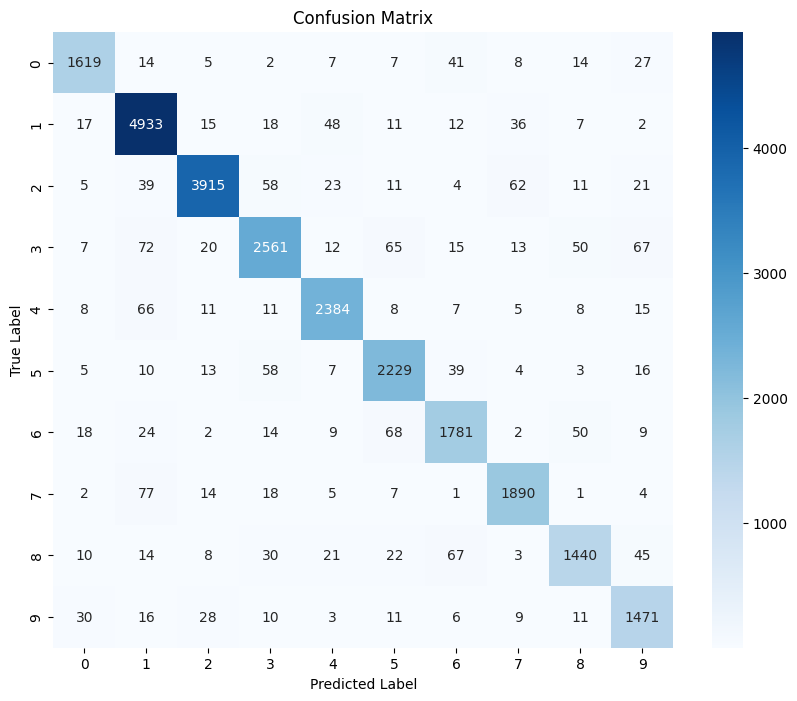

In [55]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat
from skimage import color, io
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Function to load the dataset
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

# Load training and testing data
x_train, y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
x_test, y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")

# Transpose image arrays (from (32, 32, 3, N) to (N, 32, 32, 3))
x_train = x_train.transpose((3, 0, 1, 2))
x_test = x_test.transpose((3, 0, 1, 2))

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels (modulo 10 for digit recognition)
y_train = to_categorical(y_train % 10, 10)
y_test = to_categorical(y_test % 10, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(x_train)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), 
                    validation_data=(x_test, y_test),
                    epochs=10)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate classification report and confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
